# In This Notebook we will do Visual Analysis on the **Absenteeism at Work** dataset. 
- This notebook is motivated by the data analysis workshop by Gururajan Govindan, Shubhangi Hora, and Konstantin Palagachev
- All the observations I get from the data are written before the code cell of the observaion analysis. You can see the Hypothesis testing notebook to ensure if we can't reject this observation or we rejected it.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_palette('tab10')

In [131]:
data = pd.read_csv('https://raw.githubusercontent.com'\
                   '/PacktWorkshops/The-Data-Analysis-Workshop'\
                   '/master/Chapter02/data/'\
                   'Absenteeism_at_work.csv', sep=";")
data.head().T

,0,1,2,3,4
ID,11.000,36.000,3.000,7.000,11.000
Reason for absence,26.000,0.000,23.000,7.000,23.000
Month of absence,7.000,7.000,7.000,7.000,7.000
Day of the week,3.000,3.000,4.000,5.000,5.000
Seasons,1.000,1.000,1.000,1.000,1.000
Transportation expense,289.000,118.000,179.000,279.000,289.000
Distance from Residence to Work,36.000,13.000,51.000,5.000,36.000
Service time,13.000,18.000,18.000,14.000,13.000
Age,33.000,50.000,38.000,39.000,33.000
Work load Average/day,239.554,239.554,239.554,239.554,239.554


# Descriptive Statistics 
#### As a rule of thumb it is a good thing to start the analysis by displaying the shape, missing values, types of columns and a discription about the data.

- By using the info() function:
    1. We can easily find the shape is 740 entries and total 21 columns.
    2. No missing values and types of columns.
    3. By looking at the head of the data and the info() We have to do some decoding to columns like " Month of absence,Day of the week, Seasons,Disciplinary failure, Education, Social drinker, Social smoker "
    4. We have 2 Boolean columns (Social drinker and Social smoker).


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

- Using the describe function to show the description of the numerical data.
    1. We have 28 different reasons for absence 0-28 excluding 20.
    2. Range of Ages 27-58.
    3. by looking to the (mean, median) Seems that Transportation expense and Service time will be normally distributed. but Abenteeism time in hours wouldn't be normally distributed 
    4. Seems that Hit target column is a percentage of hitting the target.

In [133]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


#  Data Preprocessing
- Decoding and Categorizing Variables:
    1. Some columns need to be decoded as mentioned in the info phase.
    2. We can categorize the Reason for absence into categories Disease and not a Disease "yes/no" by the International Code of Diseases (ICD)
    3. We can also cluster the Body mass index into three categories (Obese, Normal weight and Over weight)
    4. We can categorize absence based on age (Early young adults, Mid young adults, Mid career Professionals, Late career Professionals and Pre-retirement).

In [134]:
# Define decoding dictionaries
month_decoding = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
    0: "Unknown"
}

day_of_week_decoding = {
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday"
}

season_decoding = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

education_decoding = {
    1: "High School",
    2: "Graduate",
    3: "Postgraduate",
    4: "Master/PhD"
}

yes_no_decoding = {
    0: "No",
    1: "Yes"
}

In [135]:
preprocessed_data = data.copy()

# Define encoding dictionaries
decoding_dict = {
    "Month of absence": month_decoding,
    "Day of the week": day_of_week_decoding,
    "Seasons": season_decoding,
    "Education": education_decoding,
    "Disciplinary failure": yes_no_decoding,
    "Social drinker": yes_no_decoding,
    "Social smoker": yes_no_decoding
}

# Backtransform numerical variables to categorical using replace() method
preprocessed_data.replace(decoding_dict, inplace=True)

# Print the transformed data
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


- Creating Column Disease for the disease reasons and non-disease values.

In [136]:
# Use lambda function instead of defining a separate function as it
preprocessed_data["Disease"] = preprocessed_data["Reason for absence"].\
                                apply(
                                        lambda val: 'Yes' if val > 0 and val <= 21 else "No"
                                    )

- Categorizing people by the body mass index

In [137]:
def bod_ms_ind(val):
    if val < 18.5:
        return 'Underweight'
    elif val < 25:
        return 'Normal Weight'
    elif val < 30:
        return 'Overweight'
    else:
        return 'Obese'

preprocessed_data['BMI category'] = preprocessed_data['Body mass index'].apply(bod_ms_ind)


- Categorizing People by their age

In [138]:
def age_categorization(val):
    if val <= 30:
        return 'Early young adult'
    elif val <= 35:
        return 'Mid young adult'
    elif val <= 44:
        return 'Mid career professional'
    elif val <= 53:
        return 'Late career professional'
    else:
        return 'Pre-retirement'
    
preprocessed_data['Career level'] = preprocessed_data['Age'].apply(age_categorization)


preprocessed_data.to_csv('preprocessed_data.csv', index=False)

# The Dataset is Ready for the Visual Analysis. It's been preprocessed and cleaned. 

#### As a starting Point we will look at the histogram of all the columns at once then we'll analyze them one by one.
- Our expectations about the distribution is correct as the Transportation expense and Service time will be normally distributed. but Abenteeism time in hours wouldn't be normally distributed.

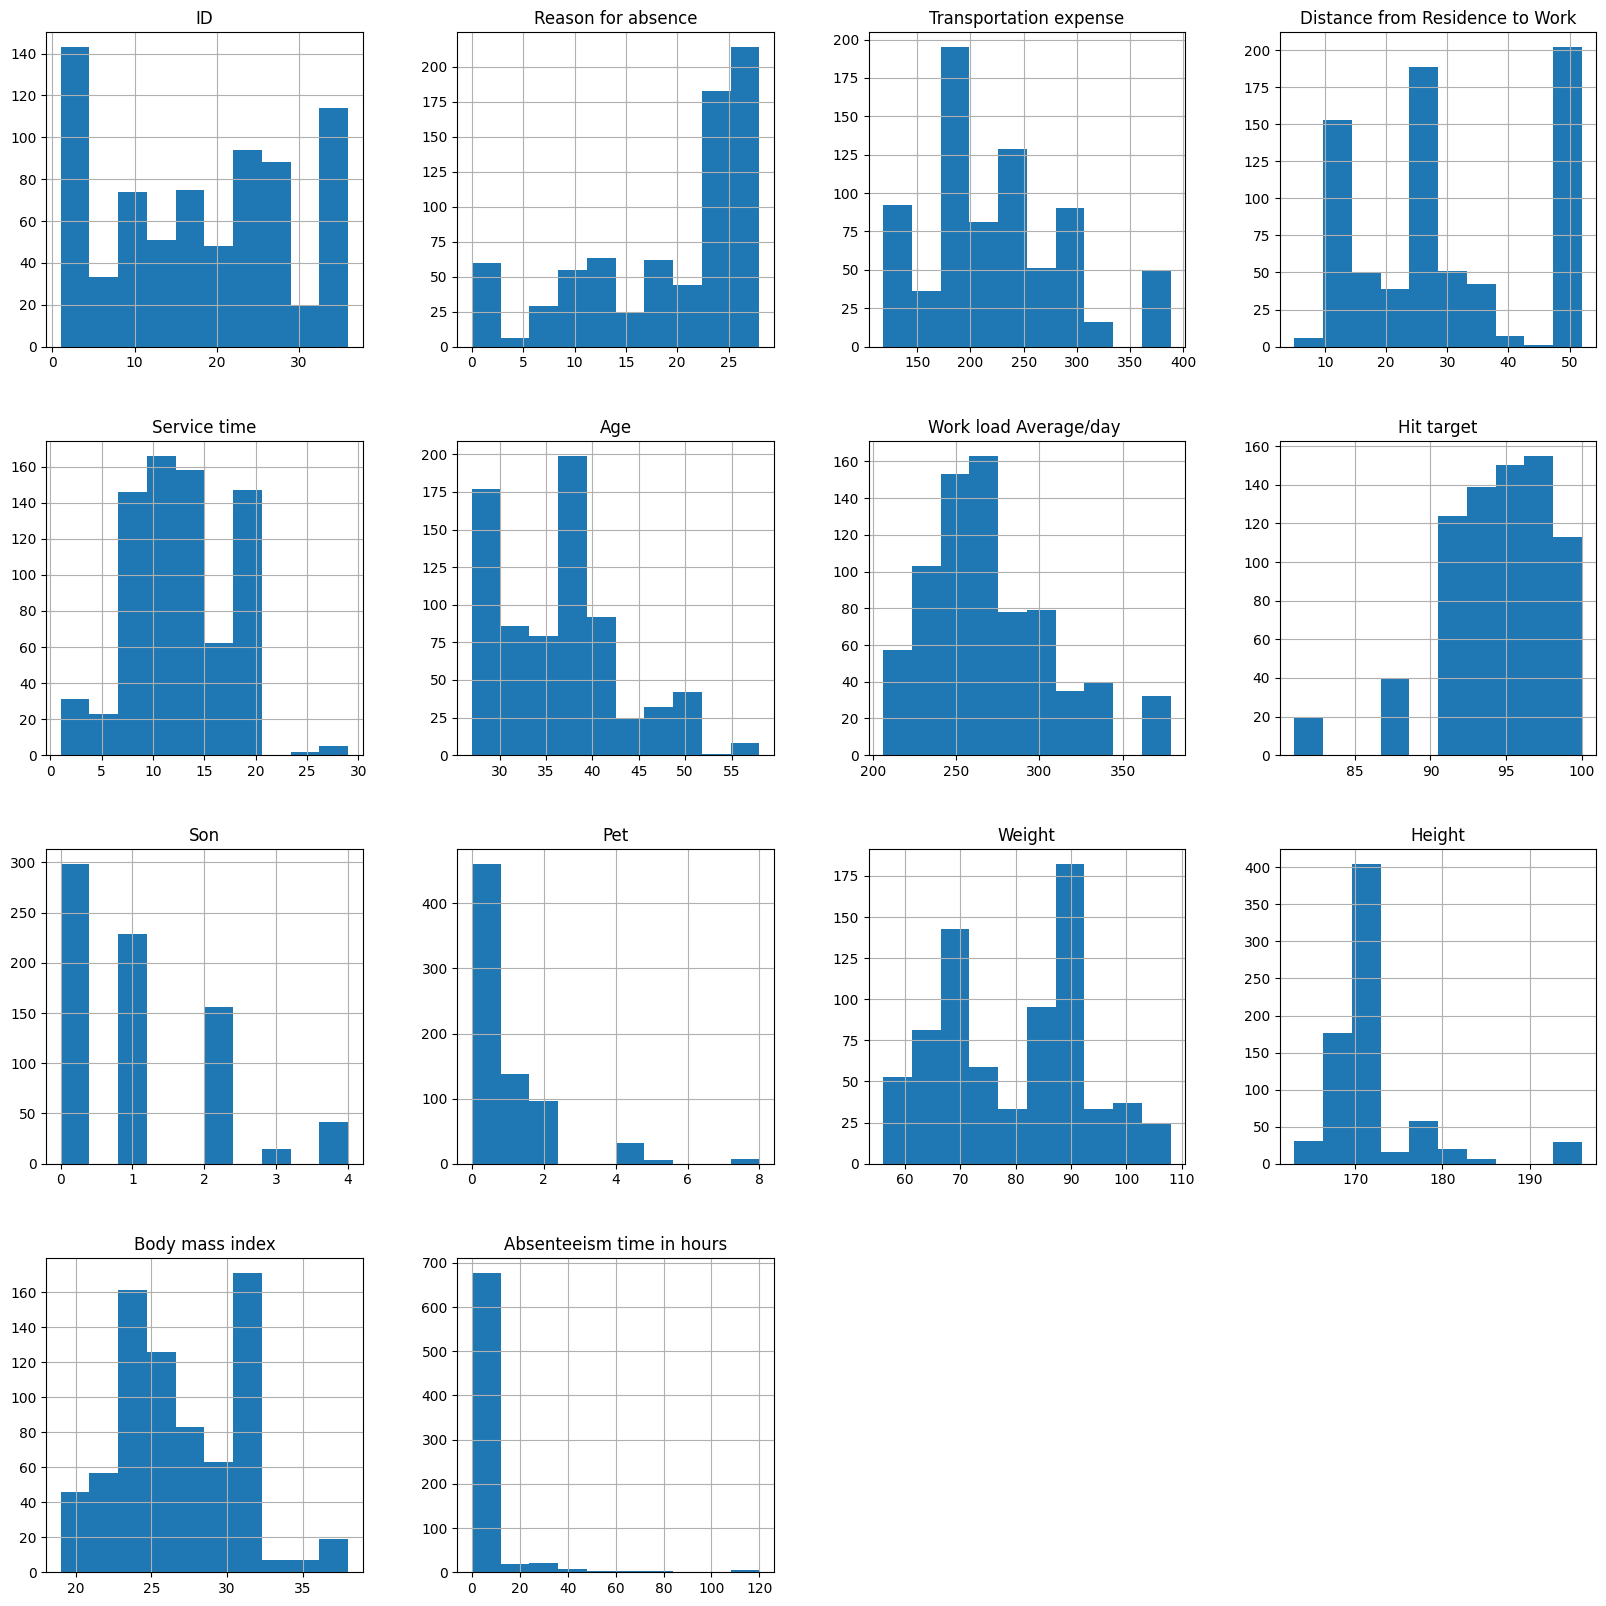

In [139]:
preprocessed_data.hist(figsize=(20, 20))
plt.savefig('figs/distributions of all columns.png', format='png')
plt.show()

### As We will go through many Countplots and histograms I will build a function for this:

In [140]:
def plot_distribution(col, figsize=(12, 6), rotation=0, hue=None, color=None):
    plt.figure(figsize=figsize)
    sns.countplot(data=preprocessed_data,
                  x=col,
                  hue=hue,
                  color=color)
    plt.title(f'Distribution of {col} column')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=rotation)
    plt.savefig(f'figs/Distribution of {col} respect to {hue}.png', format='png')
    plt.show()

#### Our most concern at the distributional analysis is the Reason for absence column. so we will lead with it.
- There is a huge peek at the 23, 28 and 27 Reasons, The three of them belong to the Not Disease Category.
- The Social smoker hue seems to exist a lot more for the disease category. we need violin plot for this.
- The Social drinker hue seem to exist a lot more for the non disease category. also need a violin plot to further test.

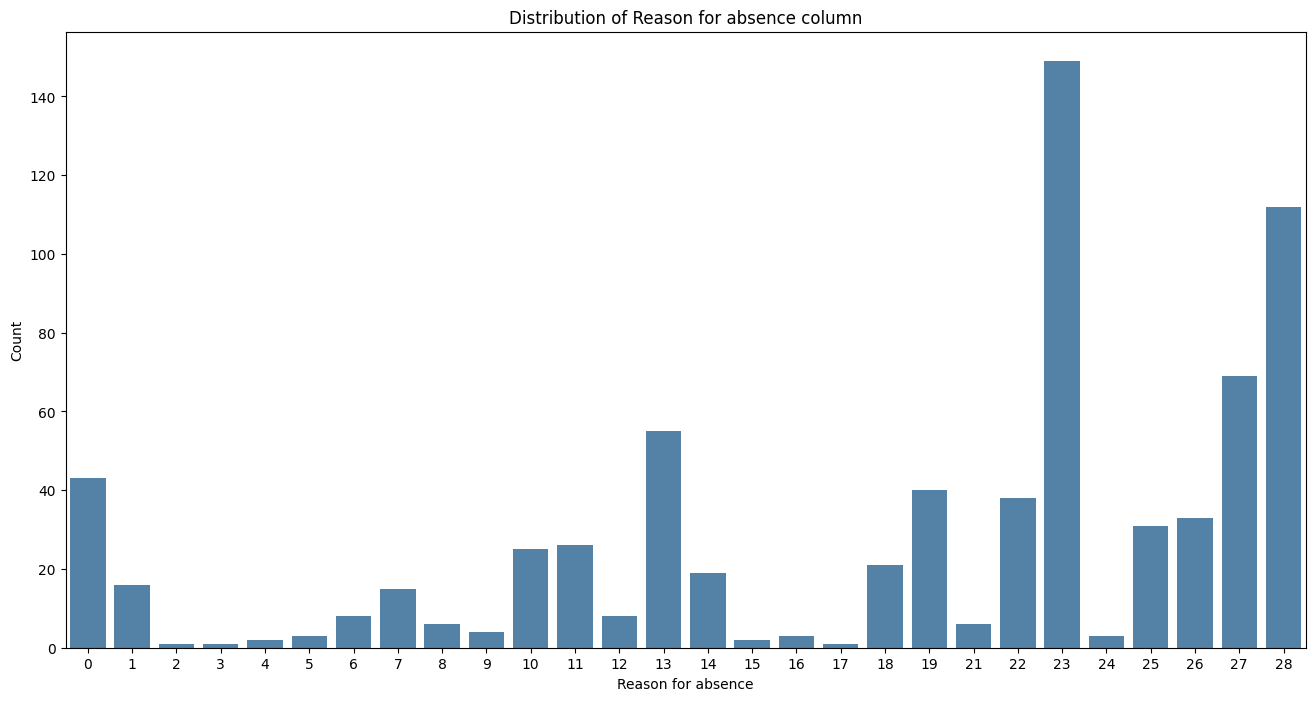

In [141]:
plot_distribution('Reason for absence', figsize=(16, 8), color='steelblue')

- Non-Disease Reasons tend to exist more than Disease ones. and on this observation we will lead with any other hue column. (we need to test that)


No     0.645946
Yes    0.354054
Name: Disease, dtype: float64


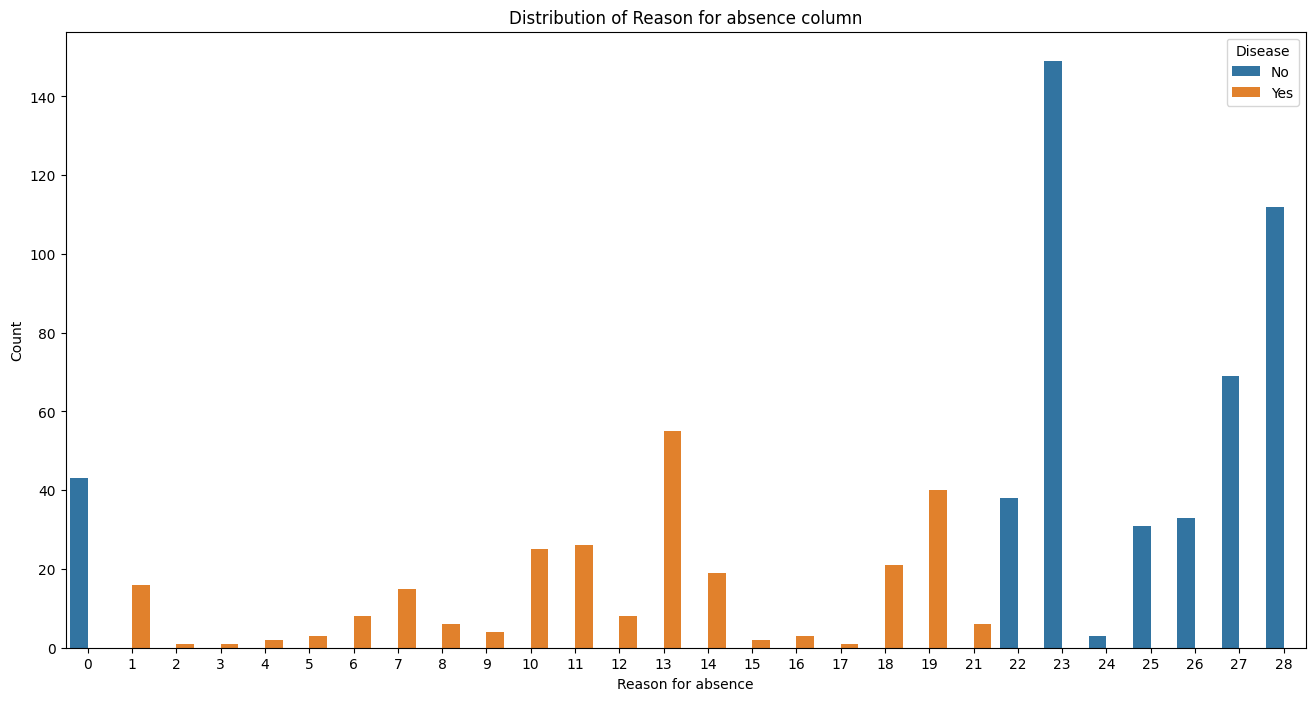

In [142]:
print(preprocessed_data.Disease.value_counts(normalize=True))
plot_distribution('Reason for absence', figsize=(16, 8), hue='Disease')

- Non-Smoking people in the Not-Disease area tend to exist more than Non-smoking people in the Disease are.
- Smokers in the disease area are equal to the Smokers in the Not-Disease area.

No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


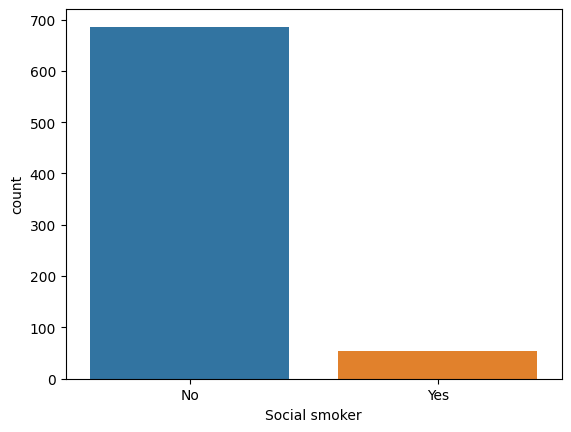

In [143]:
print(preprocessed_data['Social smoker'].value_counts(normalize=True))
sns.countplot(data=preprocessed_data,
              x='Social smoker')
plt.savefig('figs/counting social smokers.png', format='png')

Disease  Social smoker
No       No               451
         Yes               27
Yes      No               235
         Yes               27
Name: Social smoker, dtype: int64


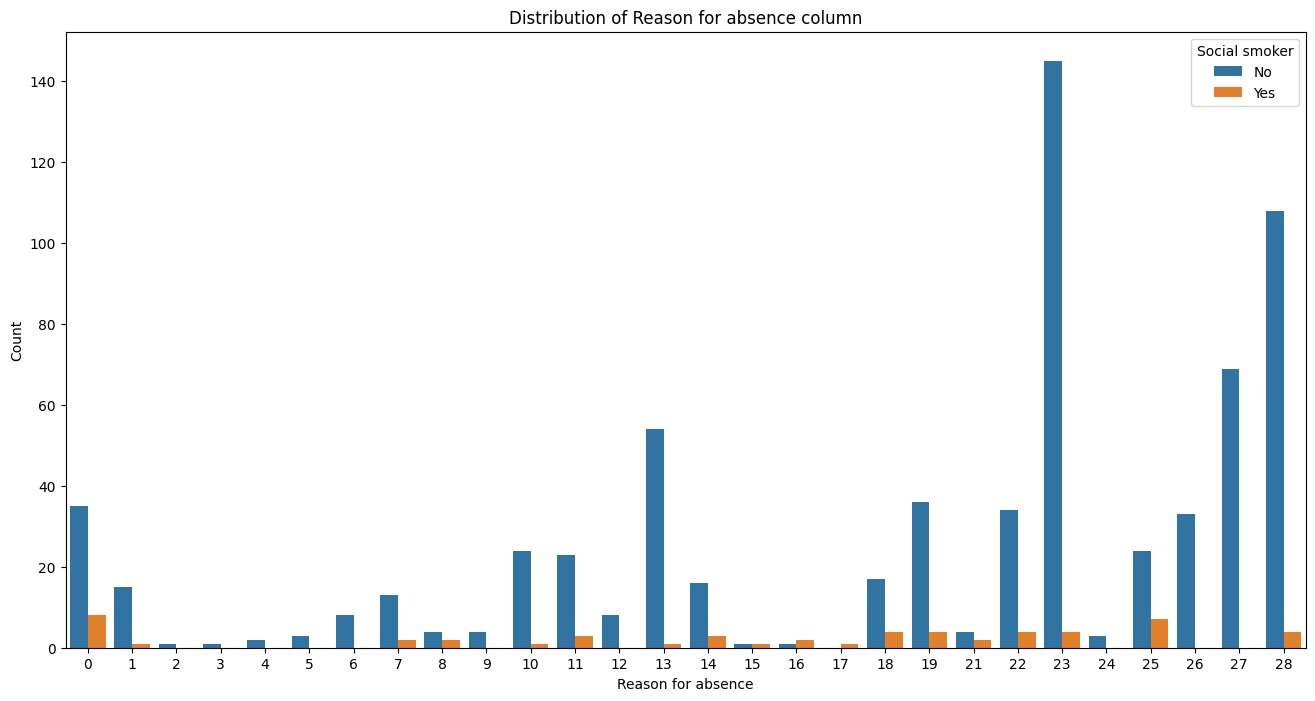

In [144]:
print(preprocessed_data.groupby('Disease')['Social smoker'].value_counts())
plot_distribution('Reason for absence', figsize=(16, 8), hue='Social smoker')

- Sounds like Drinking tend to have positive impact on the absence.

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64


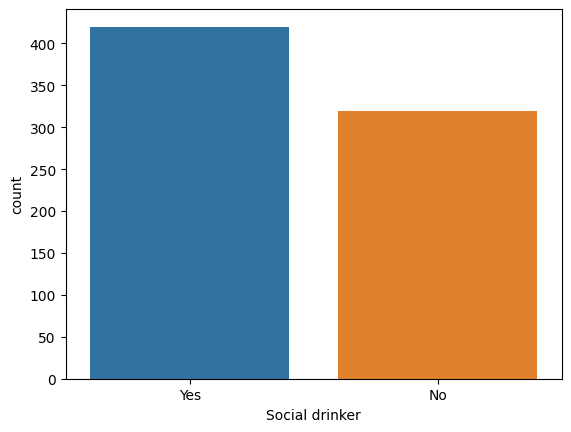

In [145]:
print(preprocessed_data['Social drinker'].value_counts(normalize=True))
sns.countplot(data=preprocessed_data,
              x='Social drinker')
plt.savefig('figs/counting social drinker.png', format='png')

Disease  Social drinker
No       Yes               281
         No                197
Yes      Yes               139
         No                123
Name: Social drinker, dtype: int64


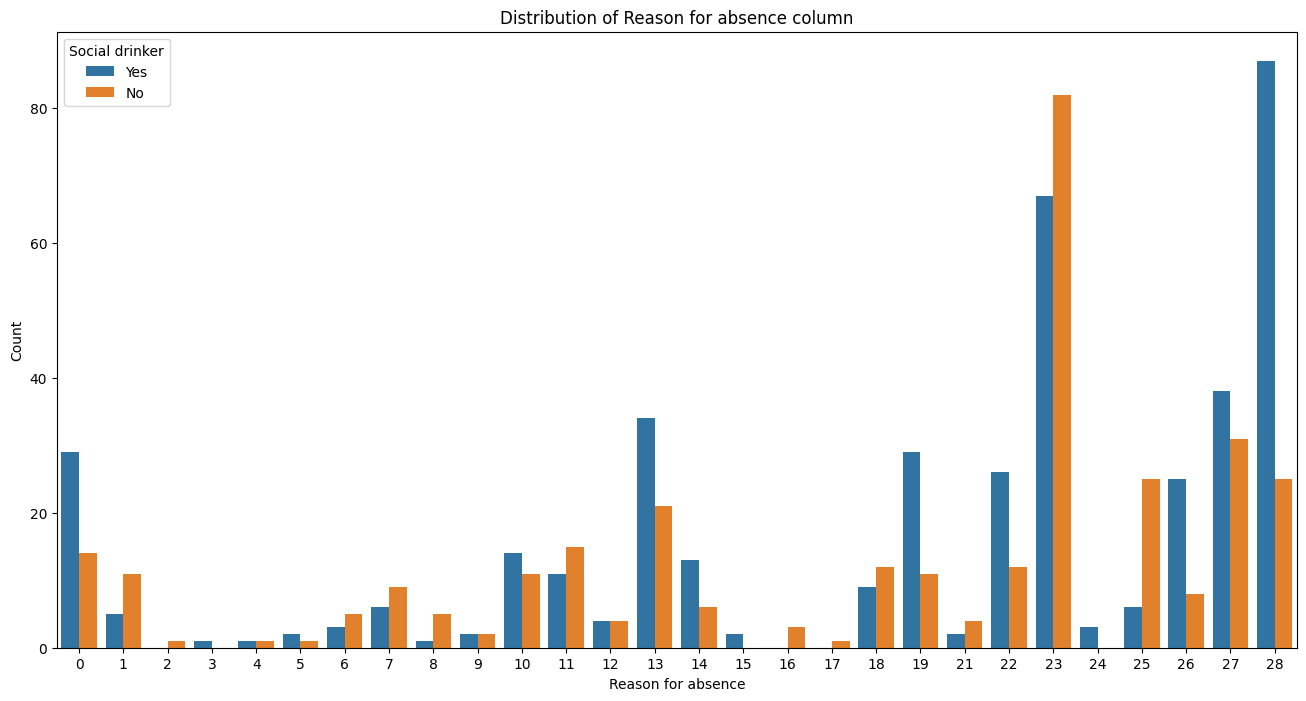

In [146]:
print(preprocessed_data.groupby('Disease')['Social drinker'].value_counts())
plot_distribution('Reason for absence', figsize=(16, 8), hue='Social drinker')

- high school education grade appears in the dataset more any other grade.
- seems that highly educated people absent less than highly ones.

High School     0.825676
Postgraduate    0.106757
Graduate        0.062162
Master/PhD      0.005405
Name: Education, dtype: float64


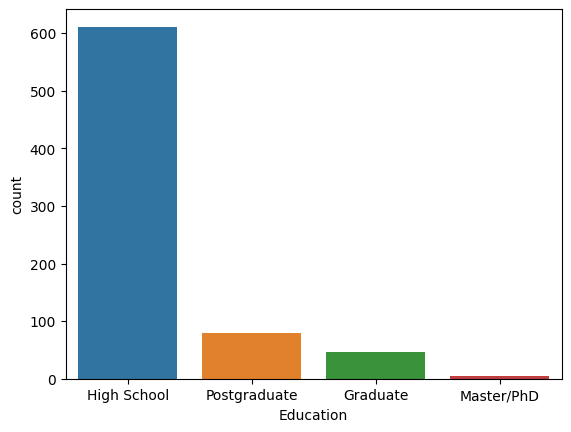

In [147]:
print(preprocessed_data['Education'].value_counts(normalize=True))
sns.countplot(data=preprocessed_data,
              x='Education')
plt.savefig('figs/counting education.png', format='png')

Disease  Education   
No       High School     412
         Postgraduate     45
         Graduate         19
         Master/PhD        2
Yes      High School     199
         Postgraduate     34
         Graduate         27
         Master/PhD        2
Name: Education, dtype: int64


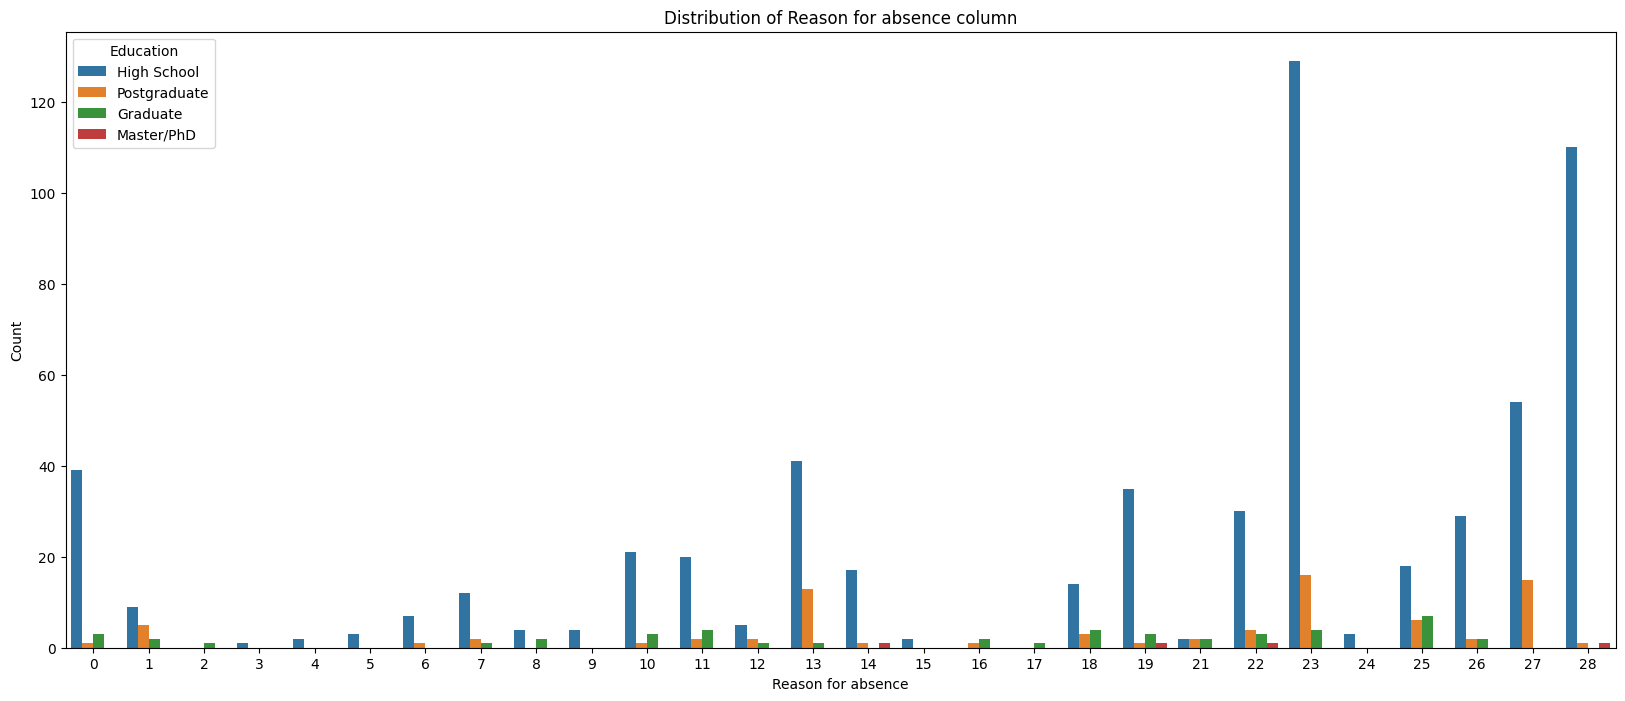

In [148]:
print(preprocessed_data.groupby('Disease')['Education'].value_counts())
plot_distribution('Reason for absence', figsize=(20, 8), hue='Education')

- the order of the BMI catgories differs in the Disease and Non-Disease area.
- there is a pattern in the no-disease area maybe weight correlates negativly with absence.

Normal Weight    0.356757
Obese            0.329730
Overweight       0.313514
Name: BMI category, dtype: float64


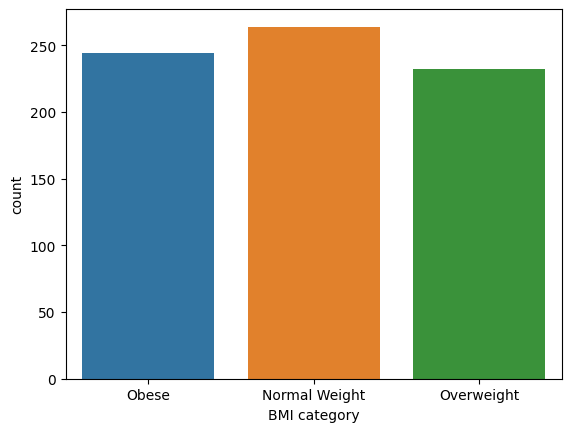

In [149]:
print(preprocessed_data['BMI category'].value_counts(normalize=True))
sns.countplot(data=preprocessed_data,
              x='BMI category')
plt.savefig('figs/counting bmi categories.png', format='png')

Disease  BMI category 
No       Obese            173
         Normal Weight    160
         Overweight       145
Yes      Normal Weight    104
         Overweight        87
         Obese             71
Name: BMI category, dtype: int64


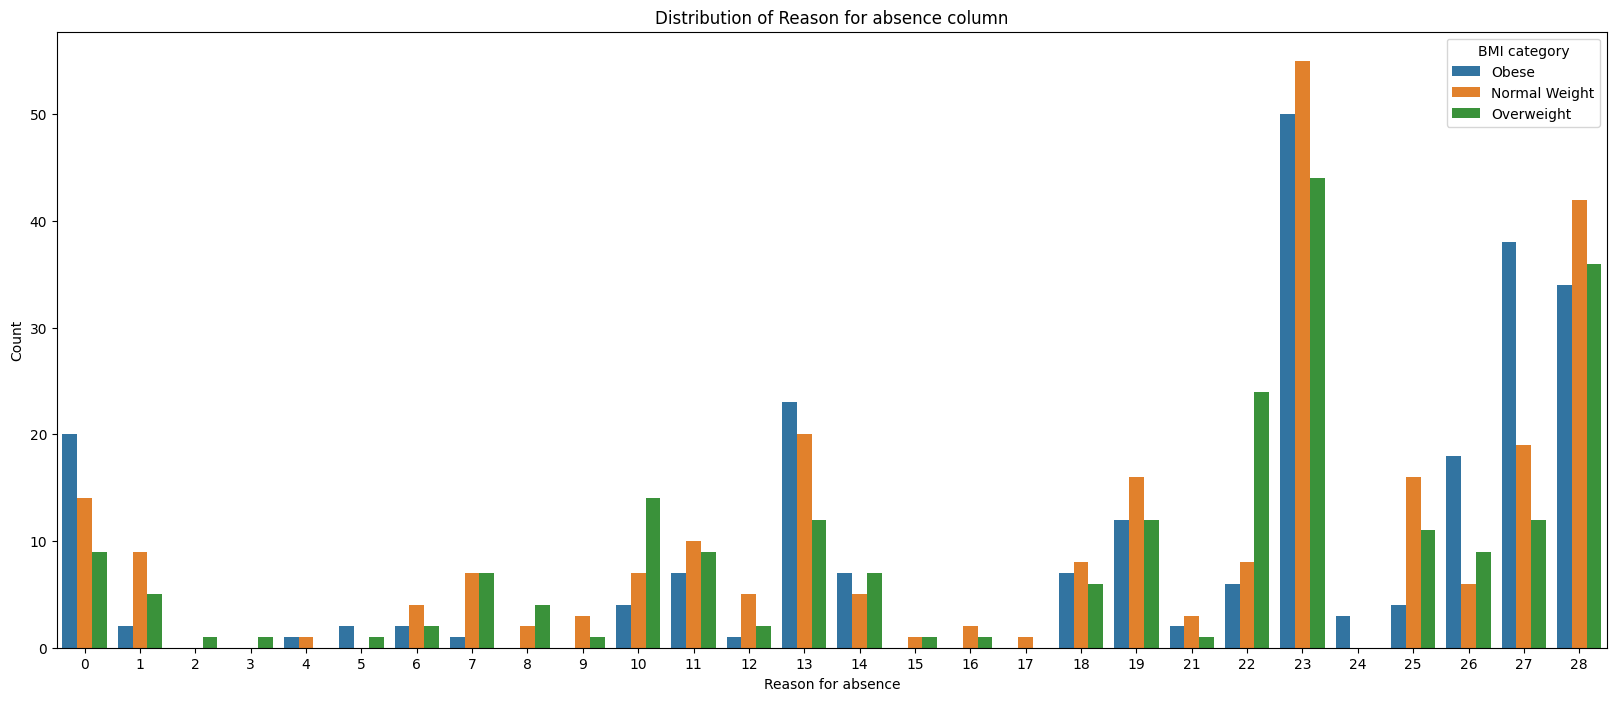

In [150]:
print(preprocessed_data.groupby('Disease')['BMI category'].value_counts())
plot_distribution('Reason for absence', figsize=(20, 8), hue='BMI category')

- Here is a quite intersting phenomena as the yes values in the Disciplinary failure only exist in the Reason 0 which indicates Unknown reason.
 and also the people succeeded in the Disciplinary test are more likely to be absent.

No     0.945946
Yes    0.054054
Name: Disciplinary failure, dtype: float64


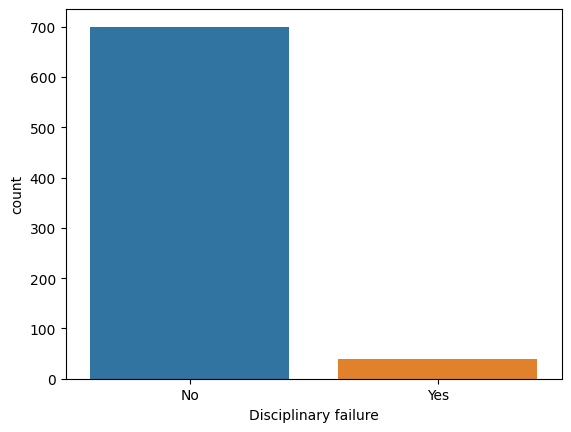

In [151]:
print(preprocessed_data['Disciplinary failure'].value_counts(normalize=True))
sns.countplot(data=preprocessed_data,
              x='Disciplinary failure')
plt.savefig('figs/counting Disciplinary failure.png', format='png')

Disease  Disciplinary failure
No       No                      438
         Yes                      40
Yes      No                      262
Name: Disciplinary failure, dtype: int64


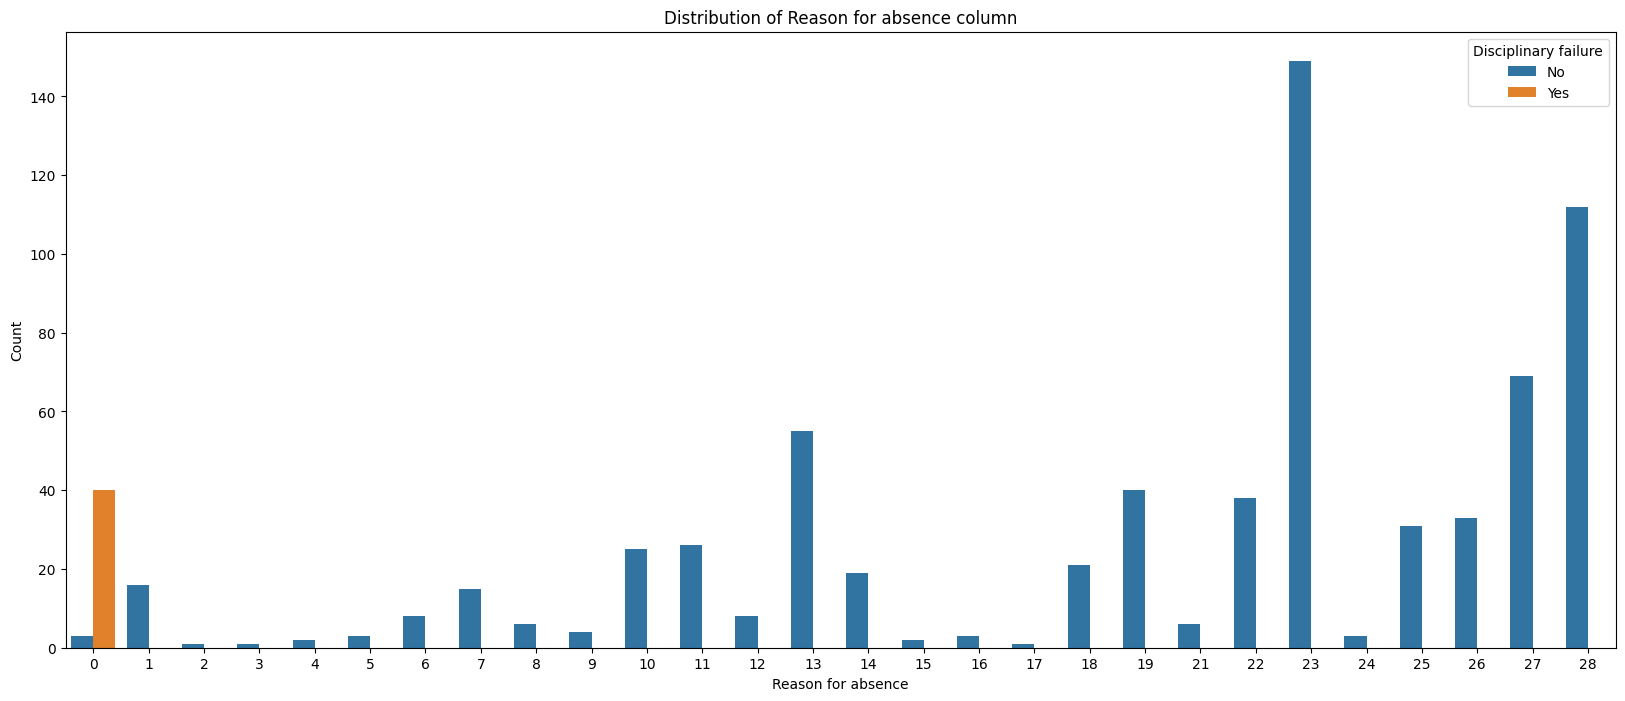

In [152]:
print(preprocessed_data.groupby('Disease')['Disciplinary failure'].value_counts())
plot_distribution('Reason for absence', figsize=(20, 8), hue='Disciplinary failure')

- Mid career professional are the top career level that tend to absent alot more than any other level.
- Early young adult are the top for Reason 23 (medical consultation).

Mid career professional     0.493243
Early young adult           0.239189
Mid young adult             0.155405
Late career professional    0.101351
Pre-retirement              0.010811
Name: Career level, dtype: float64


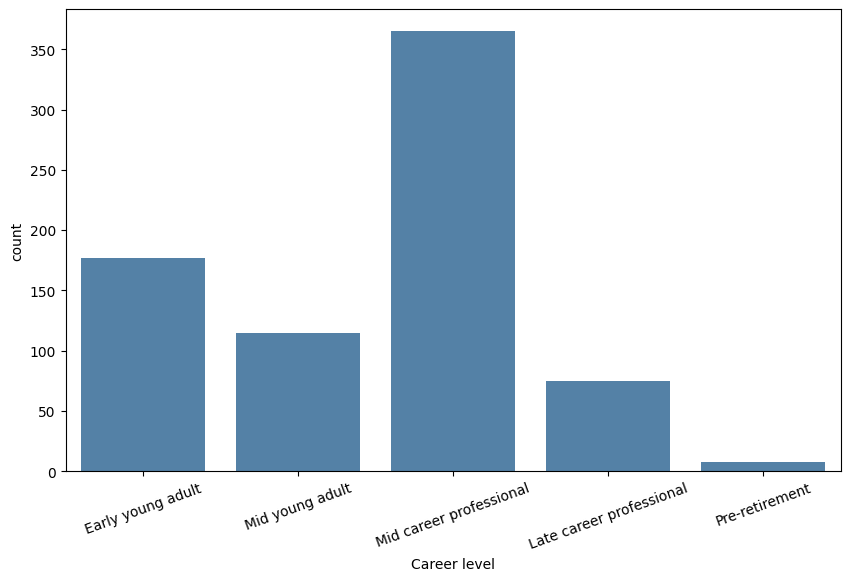

In [153]:
print(preprocessed_data['Career level'].value_counts(normalize=True))

order = ['Early young adult', 'Mid young adult', 'Mid career professional', 'Late career professional', 'Pre-retirement']
plt.figure(figsize=(10, 6))
sns.countplot(data=preprocessed_data,
              x='Career level',
              order=order,
              color='steelblue')
plt.xticks(rotation=20)
plt.savefig('figs/counting Career level.png', format='png')

Disease  Career level            
No       Mid career professional     249
         Early young adult           117
         Mid young adult              62
         Late career professional     48
         Pre-retirement                2
Yes      Mid career professional     116
         Early young adult            60
         Mid young adult              53
         Late career professional     27
         Pre-retirement                6
Name: Career level, dtype: int64


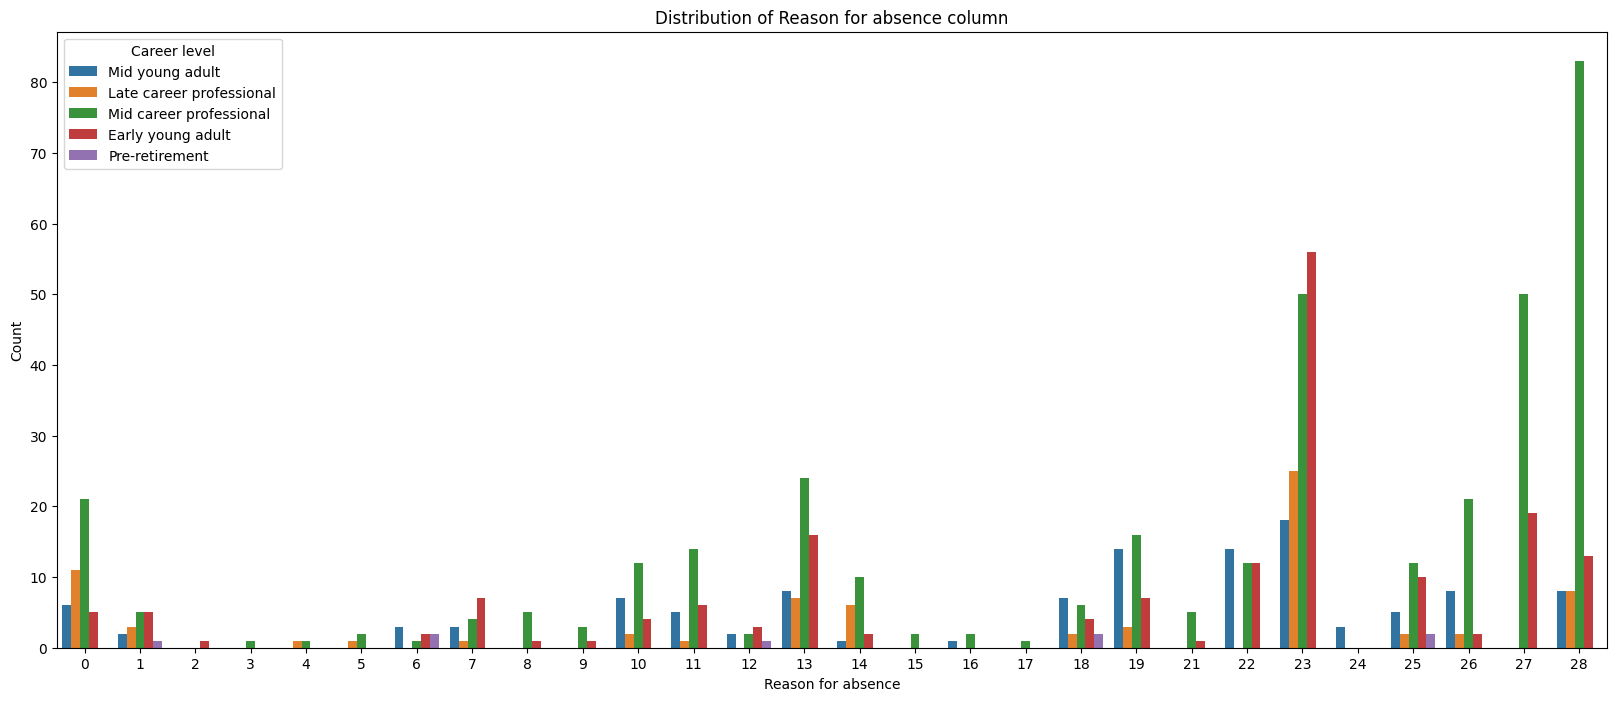

In [154]:
print(preprocessed_data.groupby('Disease')['Career level'].value_counts())
plot_distribution('Reason for absence', figsize=(20, 8), hue='Career level')

# -----------------------------------------------------------------------

#### Now as we went through Analyzing the reasons over the categorical features. We will now go the analysis with respect to the numerical features.
- We will define a custome function to plot the violin plot with X, Y labels and title and save the figure.
- The numerical columns are:
    1. 'Transportation expense',
    2. 'Distance from Residence to Work',
    3.'Service time',
    4. 'Age',
    5. 'Work load Average/day ',
    6. 'Hit target',
    7. 'Son',
    8. 'Pet',
    9. 'Weight',
    10. 'Height',
    11. 'Body mass index'

In [155]:
def plot_violin(x, y, hue=None, figsize=(20, 8)):
    plt.figure(figsize=figsize)
    sns.violinplot(data=preprocessed_data,
                  x=x,
                  y=y,
                  hue=hue)
    plt.title(f'Distribution of {x} column over {y} column')
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.savefig(f'figs/Distribution of {x} respect to {hue} over {y} column.png', format='png')
    plt.show()

In [156]:
def mean_std_for_categories(col, target):
    """
    Compute the mean and standard deviation of a target variable for each unique category in a categorical column of a dataframe.

    Parameters:
    -----------
    col : str
        The name of the categorical column.
    target : str
        The name of the target column.

    Returns:
    --------
    None
        Prints the mean and standard deviation values for each category to the console.
    """
    col_types = preprocessed_data[col].unique()
    for col_type in col_types:
        mask = preprocessed_data[col] == col_type
        data = preprocessed_data[target][mask]
        mean = data.mean()
        stddev = data.std()
        print(f"{col} type: {str(col_type):12s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")

- Seems there is a difference between drinkers and non-drinkers in time of absence. Drinkers absent long durations

Social drinker type: Yes          | Mean : 7.681 | Stddev: 13.734
Social drinker type: No           | Mean : 5.931 | Stddev: 12.736


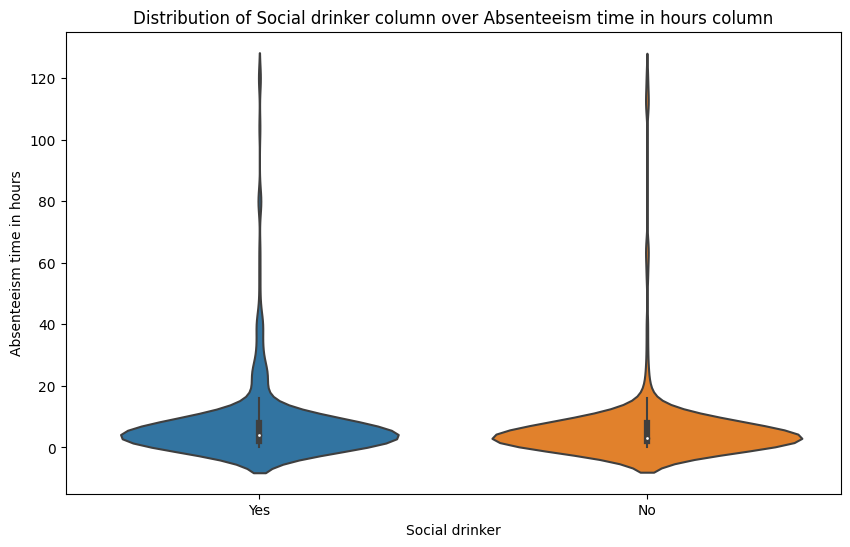

In [157]:
mean_std_for_categories(col='Social drinker', target='Absenteeism time in hours')
plot_violin(x='Social drinker', y='Absenteeism time in hours', figsize=(10, 6))

- Despite that there are some extreme values, But there is no statistical difference between smokers and non-smokers

Social smoker type: No           | Mean : 6.958 | Stddev: 13.559
Social smoker type: Yes          | Mean : 6.500 | Stddev: 10.086


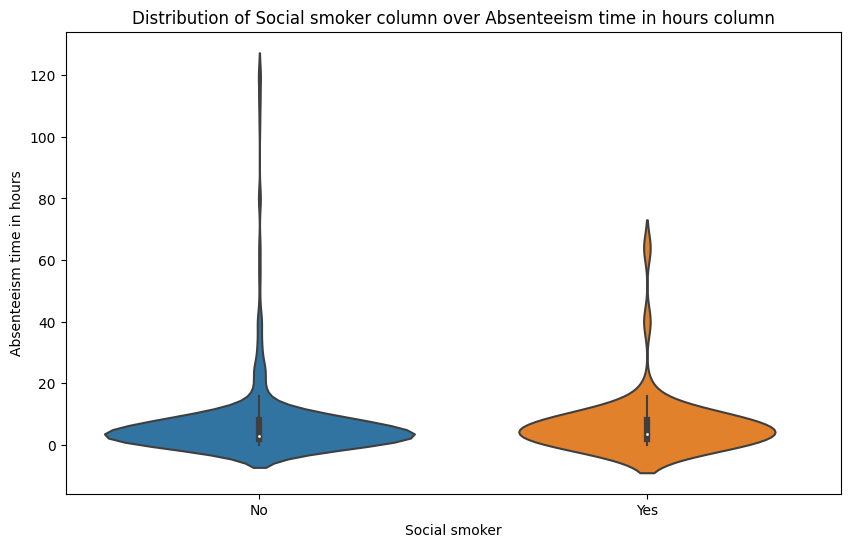

In [158]:
mean_std_for_categories(col='Social smoker', target='Absenteeism time in hours')

plot_violin(x='Social smoker', y='Absenteeism time in hours', figsize=(10, 6))

- There is no statistical difference between BMI categories in absenteeism time in hours, but there is a weak correlation that says more weight more hours absent.

BMI category type: Obese        | Mean : 5.988 | Stddev: 12.090
BMI category type: Normal Weight | Mean : 6.561 | Stddev: 13.727
BMI category type: Overweight   | Mean : 8.323 | Stddev: 14.043


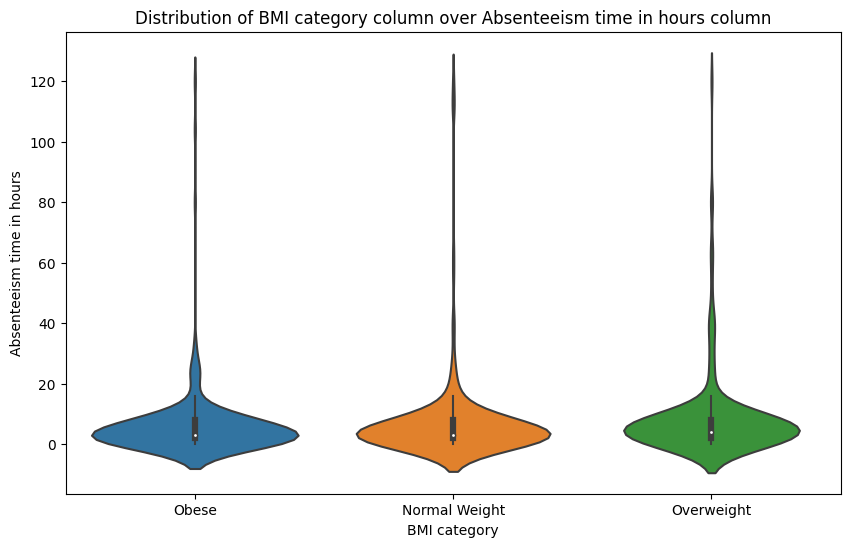

In [159]:
mean_std_for_categories(col='BMI category', target='Absenteeism time in hours')

plot_violin(x='BMI category', y='Absenteeism time in hours', figsize=(10, 6))

- We might think that old people will be more in the disease area as there is a small peek at old ages.

Disease type: No           | Mean : 36.339 | Stddev: 6.238
Disease type: Yes          | Mean : 36.653 | Stddev: 6.904


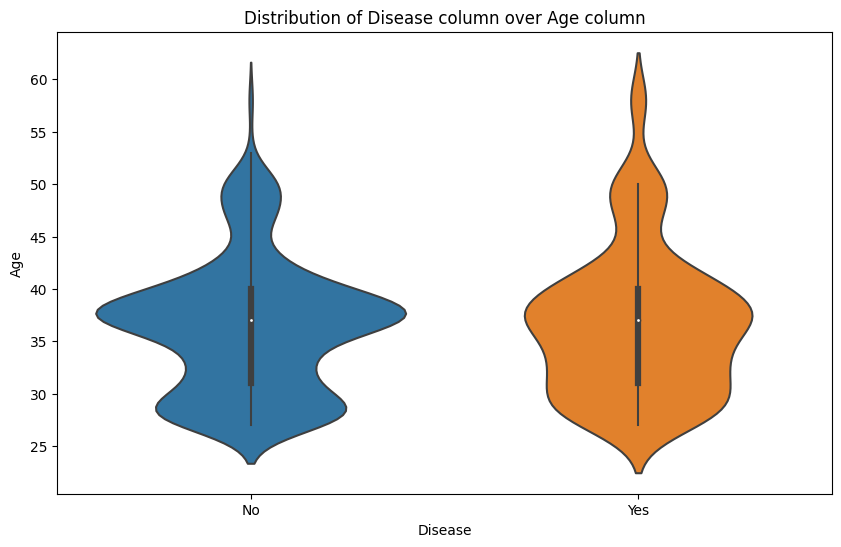

In [160]:
mean_std_for_categories(col='Disease', target='Age')

plot_violin(x='Disease', y='Age', figsize=(10, 6))

#### We might say when the postion is important this leads the person not to be absent for a long time.
- As we mentioned earlier Highly educated people tend to less absent, here we calculate the mean and standard deviation for each educational grade. We can see that both the mean and standard deviation of the hours of absence are decreasing, meaning that highly educated employees tend to have shorter absences.
- 91% of The Extreme Absenteeism time in hours come from the high school grade.


In [161]:
mean_std_for_categories(col='Education', target='Absenteeism time in hours')

Education type: High School  | Mean : 7.190 | Stddev: 14.259
Education type: Postgraduate | Mean : 5.266 | Stddev: 7.963
Education type: Graduate     | Mean : 6.391 | Stddev: 6.754
Education type: Master/PhD   | Mean : 5.250 | Stddev: 3.202


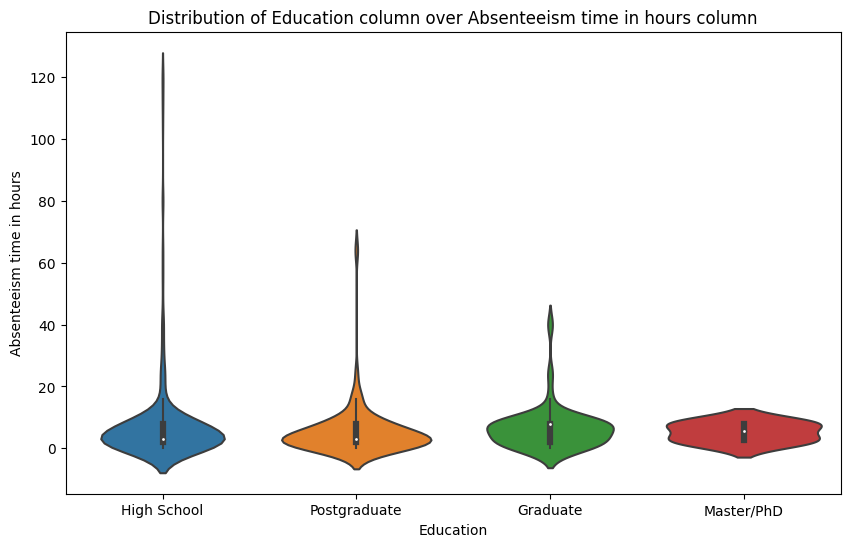

In [162]:
plot_violin(x='Education', y='Absenteeism time in hours', figsize=(10, 6))

### Transportation Costs, Distance to Work Factors and Service time

- As we can see, the distributions of Distance from Residence to Work
and Transportation expense look close to normal distributions, while the 
absenteeism time in hours is heavily right-skewed. This makes the comparison 
between the variables difficult to interpret. One solution to this problem is to 
transform the data into something close to a normal distribution. A handy way to 
perform this transformation is to use the Box-Cox or Yeo-Johnson transformations. 
- We can see that the regression line between the variables 
is almost flat for the Distance from Residence to Work column (which 
is a clear indicator of zero correlation) but has a slight upward slope for the 
Transportation Expense column. Therefore, we can expect a small 
positive correlation, on the other side the Service time we can expect negatice correlation.

<Figure size 1000x600 with 0 Axes>

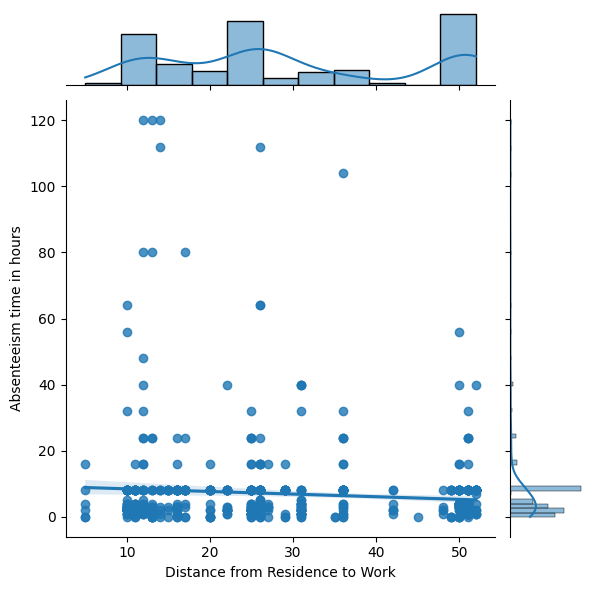

In [163]:
# plot transportation costs and distance to work against hours
plt.figure(figsize=(10, 6))
sns.jointplot(x="Distance from Residence to Work", \
              y="Absenteeism time in hours", \
              data=preprocessed_data, kind="reg")
plt.savefig('figs/distance_vs_hours.png', format='png')
plt.show()

<Figure size 1000x600 with 0 Axes>

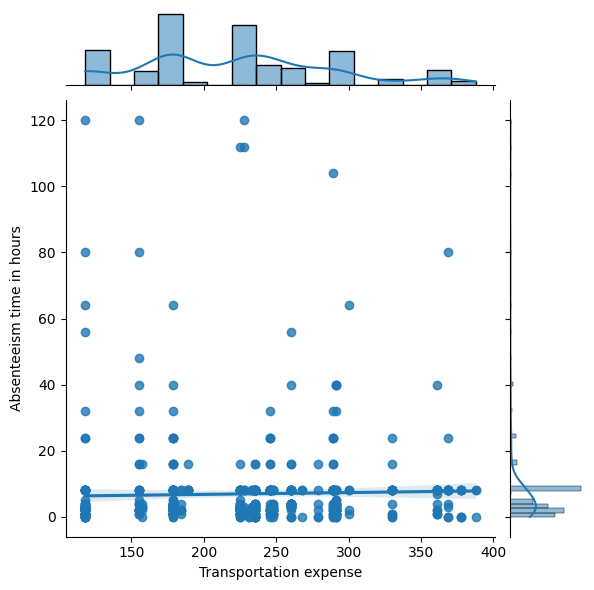

In [164]:
plt.figure(figsize=(10, 6))
sns.jointplot(x="Transportation expense", \
              y="Absenteeism time in hours", \
              data=preprocessed_data, kind="reg")
plt.savefig('figs/costs_vs_hours.png', format='png')

<Figure size 1000x600 with 0 Axes>

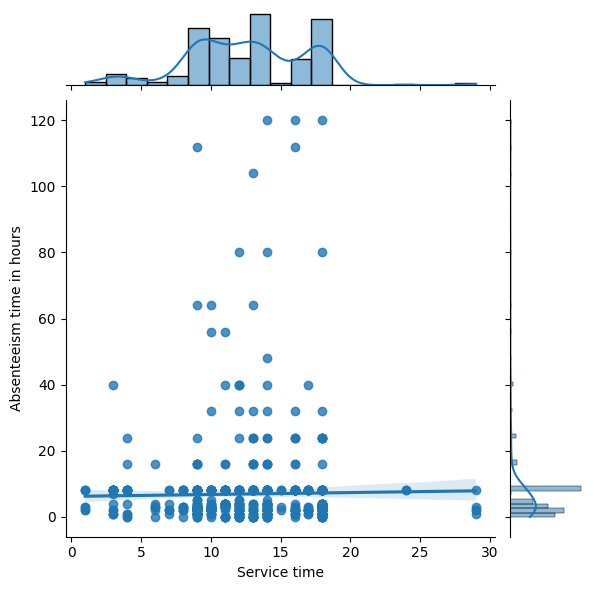

In [165]:
# plot transportation costs and distance to work against hours
plt.figure(figsize=(10, 6))
sns.jointplot(x="Service time", \
              y="Absenteeism time in hours", \
              data=preprocessed_data, kind="reg")
plt.savefig('figs/distance_vs_hours.png', format='png')
plt.show()

<Figure size 1000x600 with 0 Axes>

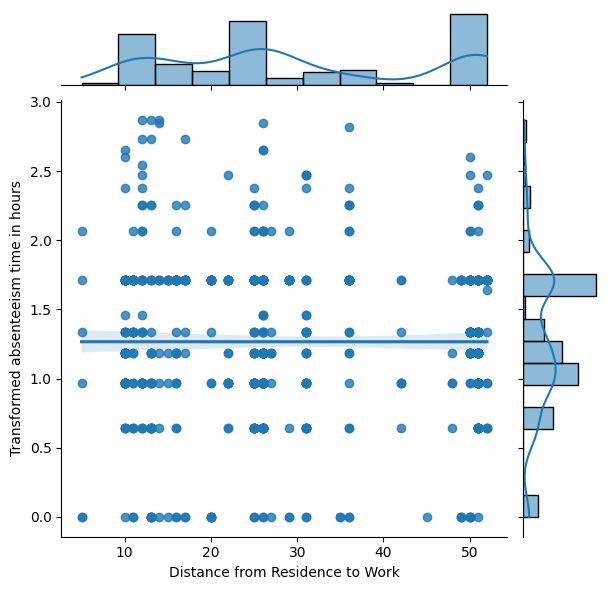

In [166]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson
hours = yeojohnson(preprocessed_data\
                   ["Absenteeism time in hours"].apply(float))
distances = preprocessed_data["Distance from Residence to Work"]
expenses = preprocessed_data["Transportation expense"]
service_time = preprocessed_data['Service time']
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work",\
 "Transformed absenteeism time in hours")
plt.savefig('figs/distance_vs_hours_transformed.png', format='png')

<Figure size 1000x600 with 0 Axes>

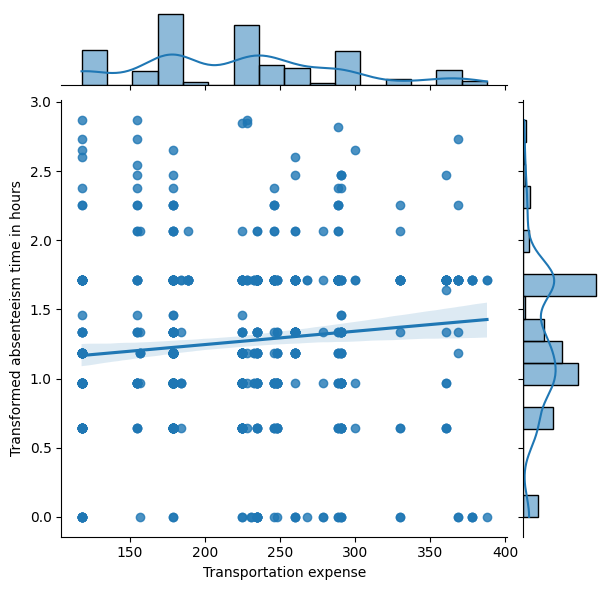

In [167]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")
ax.set_axis_labels("Transportation expense", \
 "Transformed absenteeism time in hours")
plt.savefig('figs/costs_vs_hours_transformed.png', format='png')


<Figure size 1000x600 with 0 Axes>

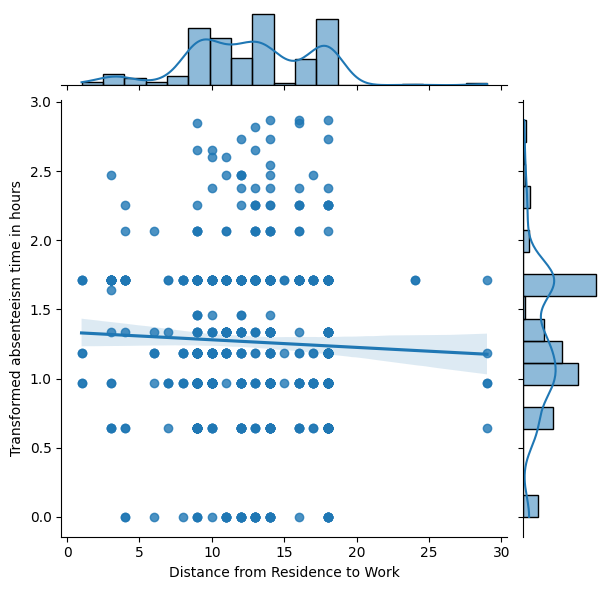

In [168]:
# run Yeo-Johnson transformation and recreate previous plots
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=service_time, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work",\
 "Transformed absenteeism time in hours")
plt.savefig('figs/service_time_vs_hours_transformed.png', format='png')

## Temporal Factors
- We will lead with Countplots of the Days and Months.
- Means and Standard Deviations for each day and each month.
- Violinplots for Absenteeism time in hours.

- we can't really see a substantial difference between 
the different days of the week or months. It seems that fewer absences occur on 
Thursday, while the month with the most absences is March, but it is hard to say that 
the difference is significant.
- Observe that the average duration of the absences is slightly shorter on 
Thursday (4.424 hours), while absences during July have the longest average 
duration (10.955 hours). To determine whether these values are statistically 
significant—that is, whether there is a statistically significant difference regarding 
the rest of the days/months

In [169]:
mean_std_for_categories(col='Day of the week', target='Absenteeism time in hours')

Day of the week type: Tuesday      | Mean : 7.981 | Stddev: 18.027
Day of the week type: Wednesday    | Mean : 7.147 | Stddev: 13.268
Day of the week type: Thursday     | Mean : 4.424 | Stddev: 4.266
Day of the week type: Friday       | Mean : 5.125 | Stddev: 7.911
Day of the week type: Monday       | Mean : 9.248 | Stddev: 15.973


Monday       0.217568
Wednesday    0.210811
Tuesday      0.208108
Friday       0.194595
Thursday     0.168919
Name: Day of the week, dtype: float64


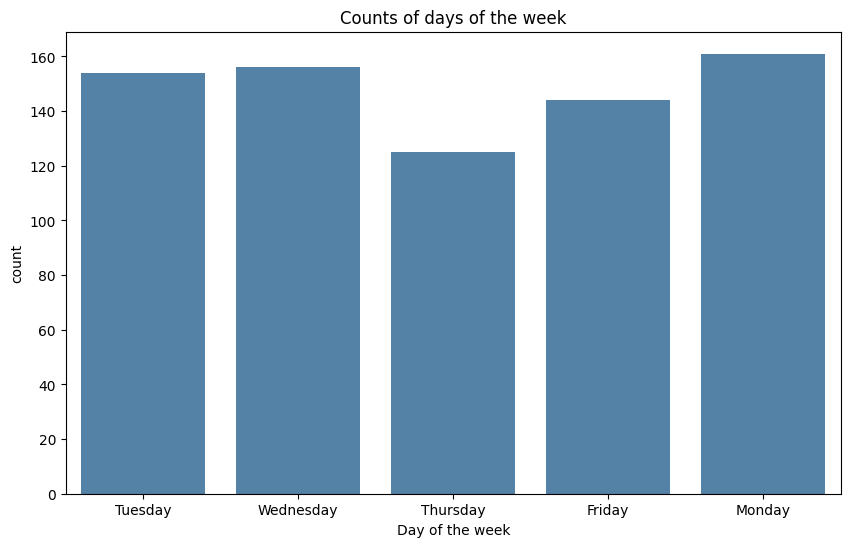

In [170]:
print(preprocessed_data['Day of the week'].value_counts(normalize=True))

plt.figure(figsize=(10, 6))
sns.countplot(data=preprocessed_data,
              x='Day of the week',
              color='steelblue')
plt.title('Counts of days of the week')
plt.savefig('figs/Counts of days of the week.png', format='png')

In [171]:
mean_std_for_categories(col='Month of absence', target='Absenteeism time in hours')

Month of absence type: July         | Mean : 10.955 | Stddev: 21.547
Month of absence type: August       | Mean : 5.333 | Stddev: 5.749
Month of absence type: September    | Mean : 5.509 | Stddev: 8.407
Month of absence type: October      | Mean : 4.915 | Stddev: 8.055
Month of absence type: November     | Mean : 7.508 | Stddev: 16.121
Month of absence type: December     | Mean : 8.449 | Stddev: 16.049
Month of absence type: January      | Mean : 4.440 | Stddev: 5.786
Month of absence type: February     | Mean : 4.083 | Stddev: 3.710
Month of absence type: March        | Mean : 8.793 | Stddev: 16.893
Month of absence type: April        | Mean : 9.094 | Stddev: 18.024
Month of absence type: May          | Mean : 6.250 | Stddev: 10.314
Month of absence type: June         | Mean : 7.611 | Stddev: 12.359
Month of absence type: Unknown      | Mean : 0.000 | Stddev: 0.000


March        0.117568
February     0.097297
October      0.095946
July         0.090541
May          0.086486
November     0.085135
August       0.072973
June         0.072973
September    0.071622
April        0.071622
January      0.067568
December     0.066216
Unknown      0.004054
Name: Month of absence, dtype: float64


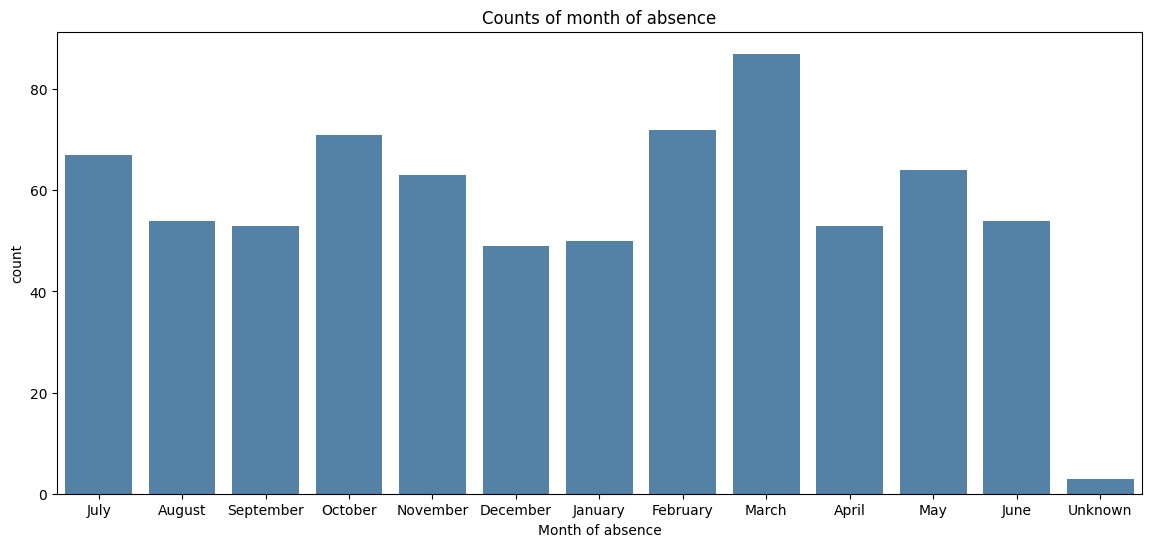

In [172]:
print(preprocessed_data['Month of absence'].value_counts(normalize=True))

plt.figure(figsize=(14, 6))
sns.countplot(data=preprocessed_data,
              x='Month of absence',
              color='steelblue')
plt.title('Counts of month of absence')
plt.savefig('figs/Counts of month of absence.png', format='png')

##  Analyzing Pet and Sons
- People with no children seems to absent more but when they absent they absent less hours than people with more children and this maybe because people with children tend to visit doctors for their children or maybe people with more children are older and that's why they visit doctors. 

0    0.402703
1    0.309459
2    0.210811
4    0.056757
3    0.020270
Name: Son, dtype: float64


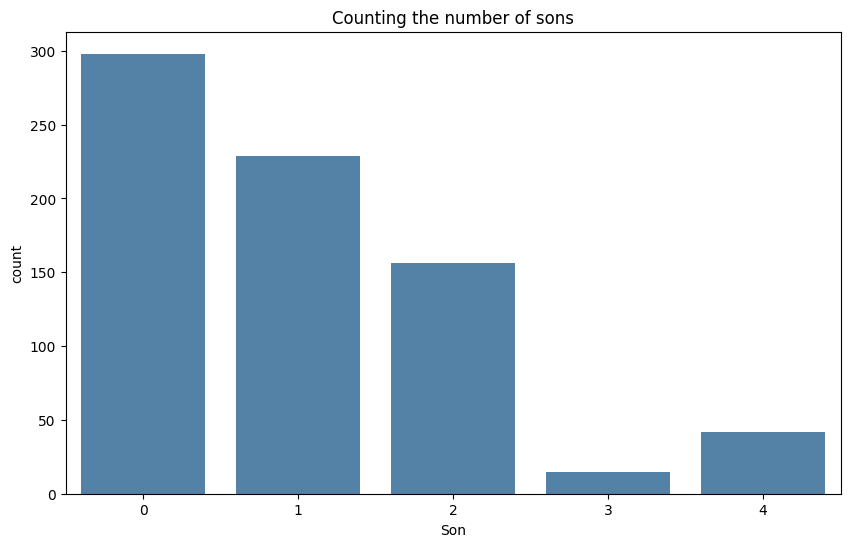

In [173]:
print(preprocessed_data.Son.value_counts(normalize=True))

plt.figure(figsize=(10, 6))
sns.countplot(data=preprocessed_data,
              x='Son',
              color='steelblue')
plt.title('Counting the number of sons')
plt.savefig('figs/Counting the number of sons.png', format='png')
plt.show()

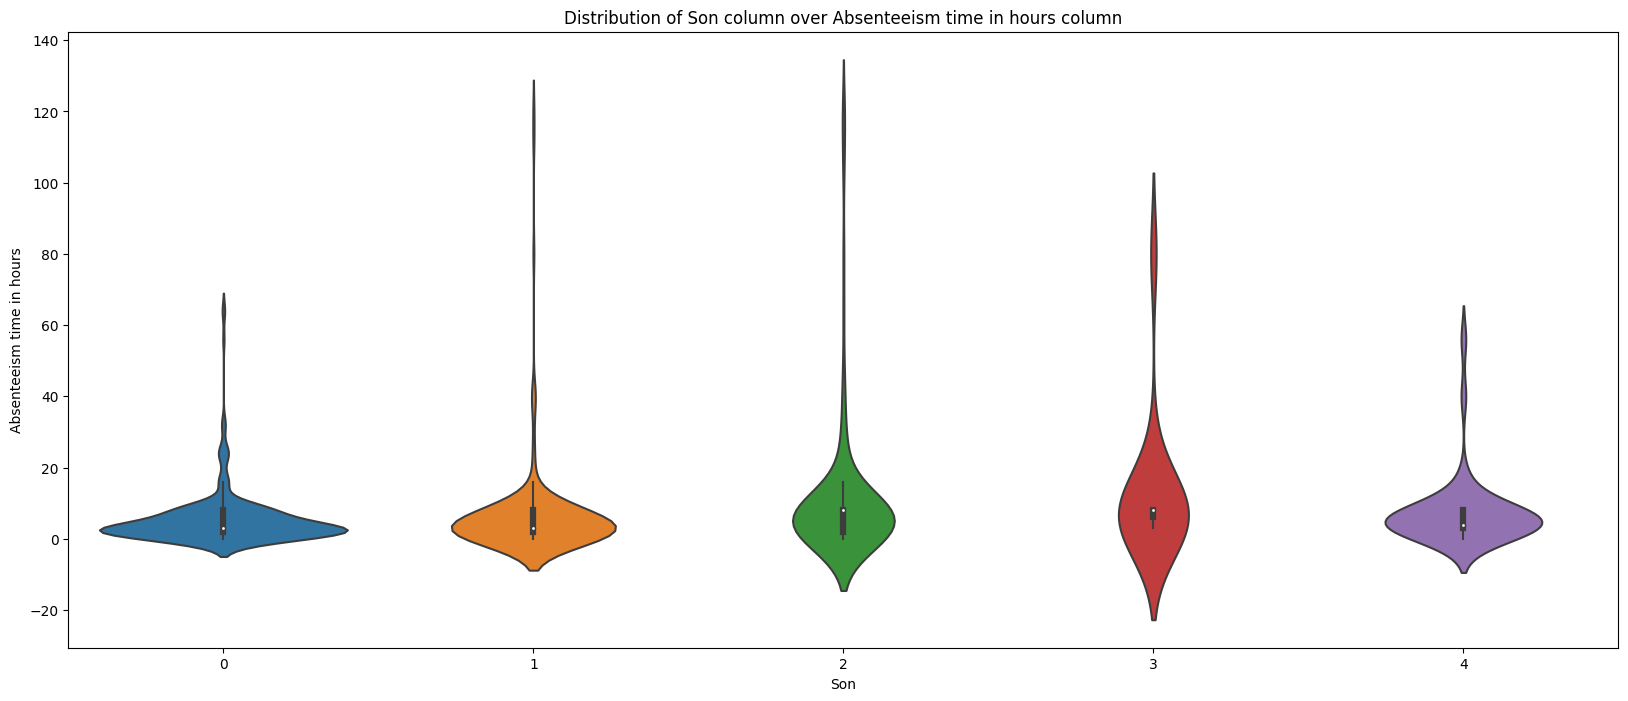

In [174]:
plot_violin(x='Son', y='Absenteeism time in hours')

- makes sense as if i have no children then when i will be absent just for myself, and the opposite for people with children as they need to be absent for them as individuals and also for their childre. We can't design other hypothesis for more children cases we need more data.

In [175]:
mean_std_for_categories(col='Son', target='Absenteeism time in hours')

Son type: 2            | Mean : 10.571 | Stddev: 19.934
Son type: 1            | Mean : 6.031 | Stddev: 13.070
Son type: 0            | Mean : 5.386 | Stddev: 7.779
Son type: 4            | Mean : 7.286 | Stddev: 9.984
Son type: 3            | Mean : 12.200 | Stddev: 19.538


- From the Countplot below We can obsereve that Having more pets tend to absent less, but from the violiln-plots and means and stdv there is a lot of fluctuations that doesn't make sense.

0    0.621622
1    0.186486
2    0.129730
4    0.043243
8    0.010811
5    0.008108
Name: Pet, dtype: float64


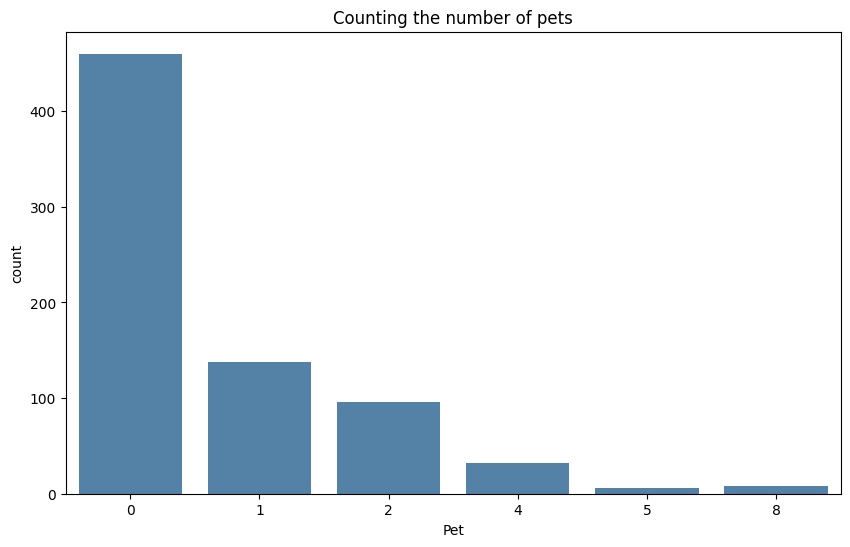

In [176]:
print(preprocessed_data.Pet.value_counts(normalize=True))
plt.figure(figsize=(10, 6))
sns.countplot(data=preprocessed_data,
              x='Pet',
              color='steelblue')
plt.title('Counting the number of pets')
plt.savefig('figs/Counting the number of pets.png', format='png')
plt.show()

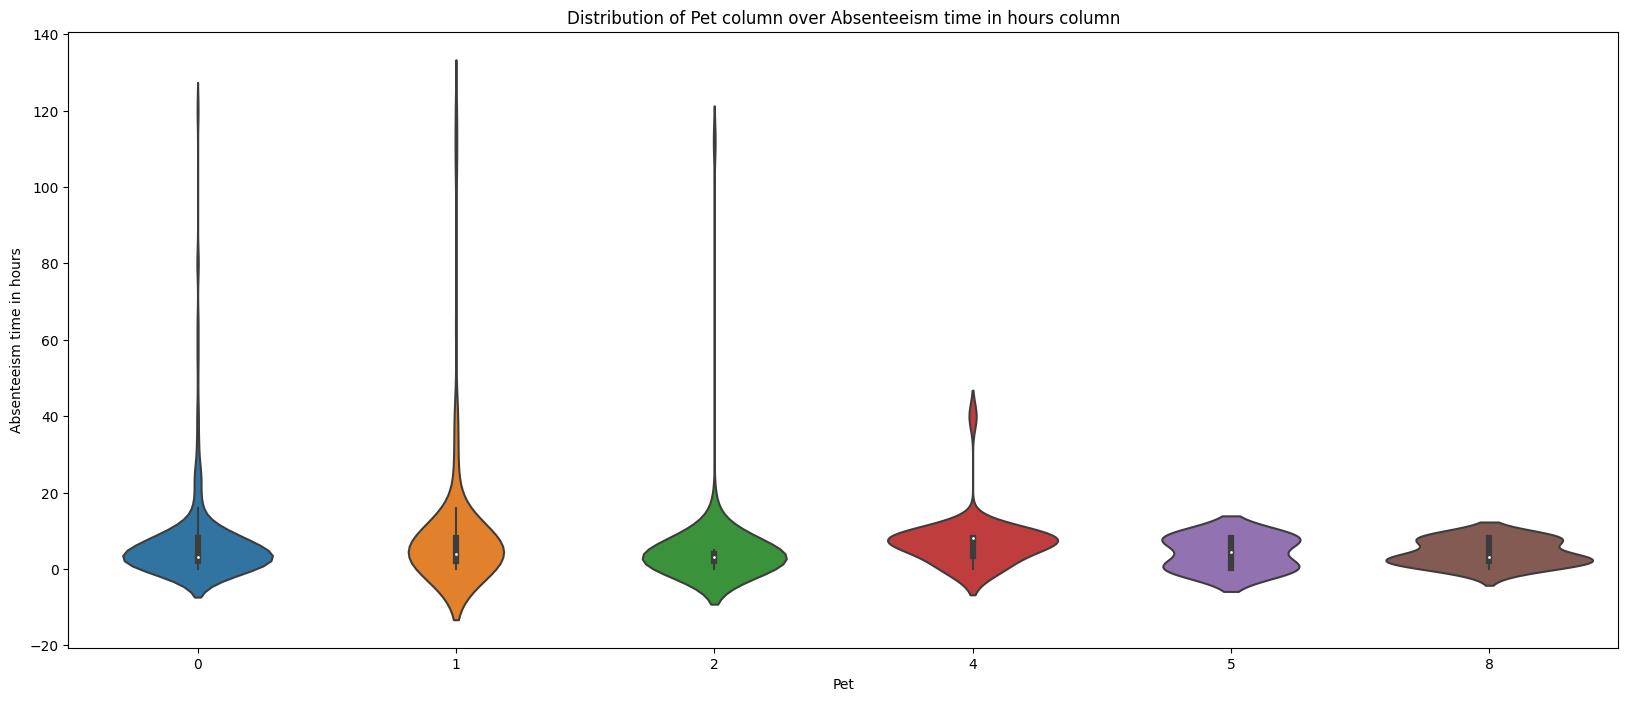

In [177]:
plot_violin(x='Pet', y='Absenteeism time in hours')

In [178]:
mean_std_for_categories(col='Pet', target='Absenteeism time in hours')

Pet type: 1            | Mean : 9.000 | Stddev: 17.814
Pet type: 0            | Mean : 6.828 | Stddev: 12.575
Pet type: 4            | Mean : 7.062 | Stddev: 6.777
Pet type: 2            | Mean : 4.750 | Stddev: 11.484
Pet type: 5            | Mean : 4.167 | Stddev: 4.215
Pet type: 8            | Mean : 4.250 | Stddev: 3.240
